In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from datetime import datetime
plt.style.use('seaborn')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

<ipython-input-2-81313b3d997c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/02- Intro to AI project/TwiBot-20/Twibot-20

/content/drive/.shortcut-targets-by-id/1b0aOZUUZU-pUB5eS1R6Z500OSwpJu5xX/02- Intro to AI project/TwiBot-20/Twibot-20


In [ ]:
df = pd.read_json('train.json')
test_tweets = pd.read_json('test.json')

# Create User Dataset

In [ ]:
df.head(5)

,ID,profile,tweet,neighbor,domain,label
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1


In [ ]:

for col in df.columns:
    print(col) 

ID
profile
tweet
neighbor
domain
label


In [ ]:
users = df['profile'].apply(pd.Series)
users[['neighbor', 'domain', 'label']] = df[['neighbor', 'domain', 'label']]

In [ ]:
users[['following', 'followers']] = users['neighbor'].apply(pd.Series)

In [ ]:
users

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,neighbor,domain,label,following,followers
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,666666,True,False,False,False,None,"[Politics, Business, Entertainment]",0,NaN,NaN
1,1297437077403885568,1297437077403885568,Jennifer Fishpaw,JenniferFishpaw,,None,,None,{'description': {'urls': []}},False,...,333333,True,True,True,False,"{'following': ['170861207', '23970102', '47293...",[Politics],1,"[170861207, 23970102, 47293791, 29458079, 1799...",[]
2,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,666666,False,False,False,False,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,"[46464108, 21536398, 18643437, 589490020, 1363...","[1275068515666386945, 2535843469, 129365759103..."
3,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",None,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,333333,True,False,False,False,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,"[2324715174, 24030137, 2336676015, 192684124, ...","[855194021458739200, 1267566832598290432, 1290..."
4,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,333333,True,False,True,False,"{'following': ['1628313708', '726405625', '130...",[Politics],1,"[1628313708, 726405625, 130868956, 26652768, 3...","[893137540185718785, 1063858543, 26665819, 241..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,1630890068,1630890068,Mike Waters,MikeWatersSYR,,None,College basketball writer at https://t.co/OOrF...,None,{'description': {'urls': [{'url': 'https://t.c...,False,...,333333,True,False,True,False,"{'following': ['237453978', '462581299', '1706...",[Sports],0,"[237453978, 462581299, 170699708, 427528170, 7...","[470498218, 49170138, 26370598, 409504213, 116..."
8274,713519580757536769,713519580757536769,Shelby Pitre,FairWarning66,,None,"My wife is my best friend, dad, Grandpa, 10th ...",None,{'description': {'urls': []}},False,...,333333,True,False,True,False,"{'following': ['36991422', '32567081', '133983...",[Sports],1,"[36991422, 32567081, 1339835893, 37534994, 196...","[1160242426050686978, 902155038201655296, 3284..."
8275,93345260,93345260,Mateo Cristiani,MateoCristiani,"Florida, USA",None,I was a professional circus acrobat for 27 yea...,None,{'description': {'urls': []}},False,...,333333,True,True,True,False,"{'following': ['714636670268792832', '23341114...",[Sports],1,"[714636670268792832, 233411141, 89217063396621...","[792119786, 892170633966219264, 131164361, 130..."
8276,1749309397,1749309397,Old Ant,notes114,"New York, USA",None,"Part time project mgt geek, full time concert ...",None,{'description': {'urls': []}},False,...,333333,True,False,True,False,"{'following': ['3124065581', '413364940', '211...",[Sports],1,"[3124065581, 413364940, 211918431, 232268199, ...","[3171160093, 798144311493853184, 2791117511, 4..."


In [ ]:
number = 1 
for col in users.columns: 
  if number == 1: 
    print("Columns in dataset:")
    number += 1 
  if number != 1: 
    print(col)

Columns in dataset:
id
id_str
name
screen_name
location
profile_location
description
url
entities
protected
followers_count
friends_count
listed_count
created_at
favourites_count
utc_offset
time_zone
geo_enabled
verified
statuses_count
lang
contributors_enabled
is_translator
is_translation_enabled
profile_background_color
profile_background_image_url
profile_background_image_url_https
profile_background_tile
profile_image_url
profile_image_url_https
profile_link_color
profile_sidebar_border_color
profile_sidebar_fill_color
profile_text_color
profile_use_background_image
has_extended_profile
default_profile
default_profile_image
neighbor
domain
label
following
followers


In [ ]:
def export_users():
  users.to_csv('users.csv', index=False)

In [ ]:
tweets = df.explode('tweet')
test_tweets = test_tweets.explode('tweet')

In [ ]:
tweets = tweets.dropna()
test_tweets = test_tweets.dropna()

In [ ]:
test_tweets_sample = test_tweets.reset_index()
idx = np.random.randint(len(test_tweets_sample), size=50)
test_tweets_sample = test_tweets_sample.loc[idx]

In [ ]:
tweets.head()

,ID,profile,tweet,neighbor,domain,label
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",RT @realDonaldTrump: THANK YOU #RNC2020! https...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",Great takeaways from last night's Republican N...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",RT @KatrinaPierson: First night of #GOP conven...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",RT @abby_draiss16: This is one of the most inc...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",RT @DanaPerino: Production of the rnc conventi...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0


In [ ]:
print(df.value_counts('label').to_csv(sep='\t'))

label	0
1	4646
0	3632



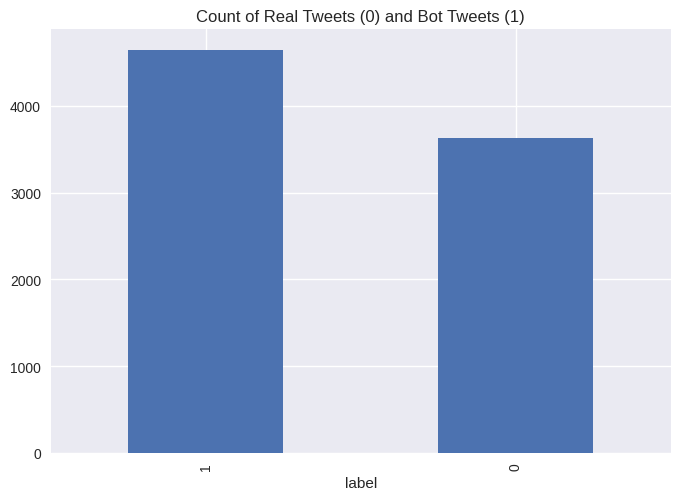

In [ ]:
# See the Breakdown of labels
df.value_counts('label').plot(kind='bar')
plt.title('Count of Real Tweets (0) and Bot Tweets (1)')
plt.show()

In [ ]:
domains = df.explode('domain')

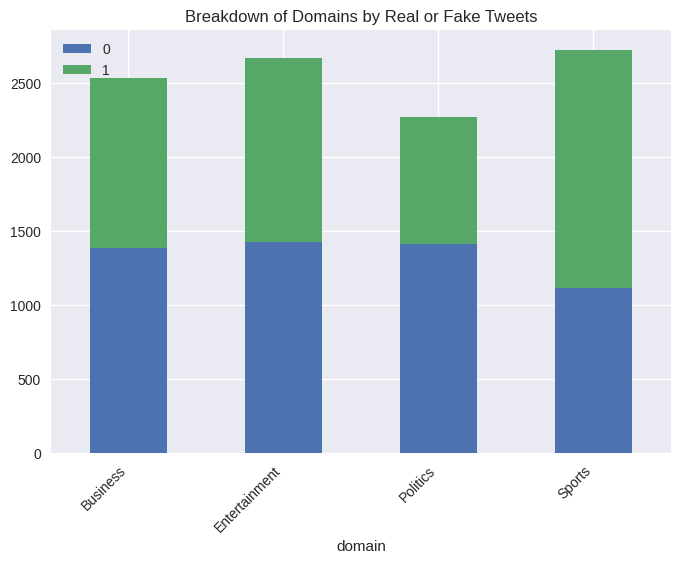

In [ ]:
domains[['domain', 'label']].value_counts().reset_index()\
  .pivot(index='domain', columns='label', values=0)\
  .plot(kind='bar', stacked=True)

plt.title('Breakdown of Domains by Real or Fake Tweets')
plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
custom_stopwords = ['the', 'co', 'https', 'rt', 'to', 'and', 'of', 
                    'in', 'you', 'is', 'amp', 'get', 'im',
                    'de', 'http', 'la', 'http', 'us', 'que', 'day', 'en', 'good', 'know', 'el',
                    'go', 'un', 'los', 'se', 'come', 'por', 'es', 'del']
stopword_list = list(list(stopwords) + custom_stopwords)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_tweets(text):

  # tokenize the text
  words = text.split(' ')
  is_RT = 1 if words[0] == 'RT' else 0
  # remove URLs
  words = [re.sub(r'http.*', "", word) for word in words]
  # rejoin then tokenize
  words = " ".join(words)
  words = word_tokenize(words)
  # remove punctuation and convert to lowercase
  words = [word.lower() for word in words if word not in string.punctuation]
  # break hashtags into words
  words = [re.sub(r'#([^\s]+)', r'\1', word) for word in words]
  # remove non-english characters
  non_english = re.compile(r'[^\x00-\x7F]+')
  words = [re.sub(non_english, '', word) for word in words]
  # lemmatize each word
  words = [lemmatizer.lemmatize(word) for word in words]
  # remove stopwords
  words = [word for word in words if word not in stopword_list]
  # add the cleaned text to the list

  cleaned_word = " ".join(words)
  return cleaned_word, is_RT

In [ ]:
def get_cleaned_dataset(df):
  # Clean the text
  df['func'] = df['tweet'].apply(lambda x: clean_tweets(x))
  df[['cleaned_tweets', 'is_RT']] = df['func'].apply(pd.Series)
  df = df.drop(columns='func')

  # Get the Mentions
  mentions = df['tweet'].str.findall(r'@(\w+)').apply(pd.Series).fillna(0)
  mentions.columns = [f'mention_{col}' for col in mentions.columns]
  # Join the dummy columns back to the original DataFrame
  df = df.join(mentions)

  # Split the Domain columns
  dummies = pd.get_dummies(df['domain']\
              .apply(pd.Series)\
              .stack())\
              .sum(level=0)
  df = df.join(dummies)
  df = df.drop('domain', axis=1)
  return df

In [ ]:
get_cleaned_dataset(test_tweets_sample)

,index,ID,profile,tweet,neighbor,label,cleaned_tweets,is_RT,mention_0,mention_1,mention_2,mention_3,Business,Entertainment,Politics,Sports
161701,1092,822804896273616896,"{'id': '822804896273616897 ', 'id_str': '82280...","RT @BettyBowers: Dementia Don is rattled, not ...","{'following': ['2193135944', '8874180595013058...",1,bettybowers dementia rattled bad poll number p...,1,BettyBowers,0,0,0,0,0,0,1
100689,711,28859485,"{'id': '28859485 ', 'id_str': '28859485 ', 'na...",@nicecobra @Shopify @craigmillr This should be...,"{'following': ['19104172', '36386370', '253758...",1,nicecobra shopify craigmillr profile photo thi...,0,nicecobra,Shopify,craigmillr,craigmillr,0,1,0,0
103100,726,3243658266,"{'id': '3243658266 ', 'id_str': '3243658266 ',...",RT @pictoline: ¿Problemas para ahorrar? 🐖💸\n\n...,"{'following': [], 'follower': ['96576419077763...",0,pictoline problemas para ahorrar quiz estos s...,1,pictoline,0,0,0,0,1,0,0
48249,383,4311884135,"{'id': '4311884135 ', 'id_str': '4311884135 ',...",RT @Thaatangel: It truly be this dry ass phone\n,"{'following': ['2545953718', '422333490', '308...",0,thaatangel truly dry phone,1,Thaatangel,0,0,0,1,0,0,0
44713,362,807959862541950976,"{'id': '807959862541950981 ', 'id_str': '80795...",Yo soy SIMONISTA\n,"{'following': ['710489855139127296', '93519539...",0,yo soy simonista,0,0,0,0,0,1,0,0,0
25173,230,1545145386,"{'id': '1545145386 ', 'id_str': '1545145386 ',...",RT @fitapofficial: So outdoor gyms can open fr...,"{'following': ['93492604', '305694283', '22321...",0,fitapofficial outdoor gym open today wale gym ...,1,fitapofficial,0,0,0,0,0,1,0
15745,146,24959108,"{'id': '24959108 ', 'id_str': '24959108 ', 'na...",RT @Surgeon_General: Maintaining our well-bein...,"{'following': ['22837186', '822215673812119553...",0,surgeon_general maintaining well-being difficu...,1,Surgeon_General,0,0,0,1,0,1,0
56620,437,952929619,"{'id': '952929619 ', 'id_str': '952929619 ', '...",RT @ProjectLincoln: Thank you for your service...,"{'following': ['263219998', '19798578', '11019...",1,projectlincoln thank service patriotism avindman,1,ProjectLincoln,AVindman,0,0,1,0,0,0
150303,1028,787981196,"{'id': '787981196 ', 'id_str': '787981196 ', '...",Here @Acosta\nHe doesn't know what he's saying...,"{'following': ['1144080488472207370', '1201622...",1,acosta doe n't 's saying 's hard time even rea...,0,Acosta,0,0,0,0,0,0,1
91548,650,342307674,"{'id': '342307674 ', 'id_str': '342307674 ', '...",@EPatGolf Dumb questions should get simple ans...,"{'following': ['111962487', '88301643205702451...",0,epatgolf dumb question simple answer,0,EPatGolf,0,0,0,0,1,0,0


In [ ]:
tweets = get_cleaned_dataset(tweets.reset_index())

In [ ]:
test_tweets = get_cleaned_dataset(test_tweets.reset_index())

# Data Exploration

### User Exploration

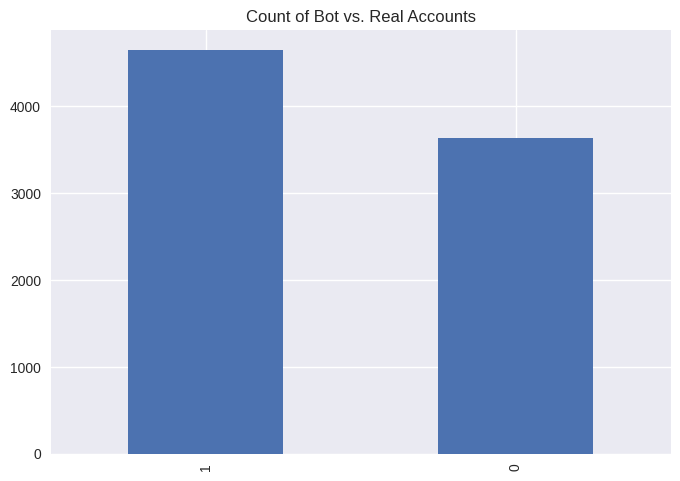

In [ ]:
users['label'].value_counts().plot(kind='bar')
plt.title('Count of Bot vs. Real Accounts')
plt.show()

In [ ]:
users.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'neighbor', 'domain', 'label', 'following', 'followers'],
      dtype='object')

In [ ]:
users[users['profile_image_url'].str.contains('default_profile_normal.png')]

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,default_profile_image,neighbor,domain,label,following,followers,created_date,age,screen_name_length,name_length
18,764941707133812736,764941707133812736,Jean,jean_schumaker,"Holland, OH",None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['476848835', '3306686908', '599...",[Politics],1,"[476848835, 3306686908, 59949396, 67686246, 51...","[1256698712677666816, 1097962803154087936, 953...",2016-08-14,4.383562,15,5
51,1279851861370077184,1279851861370077184,Harold,Harold54059315,,None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['818876014390603776', '82221567...",[Politics],1,"[818876014390603776, 822215679726100480, 41634...","[936414158471475201, 1249601633375227904, 1104...",2020-07-05,0.490411,15,7
110,1297890577040773121,1297890577040773121,2NYCE,2NYCE7,,None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['34430522', '1073336054', '2291...",[Politics],0,"[34430522, 1073336054, 22910295, 1960613304, 3...",[],2020-08-24,0.353425,7,6
146,722586421622611968,722586421622611968,Helenea Dolce,DolceHelenea,,None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['807095', '18266688', '19616835...",[Politics],1,"[807095, 18266688, 196168350, 54412900, 182275...","[850507814023942144, 843158495440650240, 10541...",2016-04-20,4.701370,13,14
180,1274612817820356608,1274612817820356608,Ivonne,Ivonne75440337,,None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['168541923', '77078194034128896...",[Politics],1,"[168541923, 770781940341288960, 12784081712672...","[1248413920815190016, 1230543078869438464]",2020-06-21,0.528767,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8027,836262200239091712,836262200239091712,Michelle,Michell64866524,,None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['505770852', '37160904', '63575...",[Sports],1,"[505770852, 37160904, 635751460, 105866710, 54...","[797599901701943296, 508137995, 191893928, 912...",2017-02-27,3.843836,16,9
8050,3400184259,3400184259,riverwyn,riverwyn,"Copenhagen, Denmark",None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['1071537984', '15162519', '3706...",[Sports],1,"[1071537984, 15162519, 37066353, 616171439, 18...","[20721177, 1669318501, 3013841723, 1251761587,...",2015-08-02,5.419178,9,9
8156,1299225885254529024,1299225885254529024,Sports for Life,SFLtheshow,"Salina, KS",None,Three college students bringing you all sports...,https://t.co/c1DvHBu7o7,{'url': {'urls': [{'url': 'https://t.co/c1DvHB...,False,...,True,"{'following': ['35936474', '54791458', '628949...",[Sports],0,"[35936474, 54791458, 62894963, 24224425, 22178...","[733292532633731074, 885739634696650753, 95344...",2020-08-28,0.342466,11,16
8224,947653922491166720,947653922491166720,sylvia klukkert,KlukkertSylvia,,None,,None,{'description': {'urls': []}},False,...,True,"{'following': ['1214204147467030529', '4143531...",[Sports],1,"[1214204147467030529, 414353122, 536904693, 44...","[2166171076, 766719206247108608, 7063015168780...",2018-01-01,3.000000,15,16


In [ ]:
users['created_date'] = pd.to_datetime(users['created_at'])
users['created_date'] = users['created_date'].dt.date

In [ ]:
users['age'] = users['created_date'].apply(lambda x: (pd.to_datetime('2020-12-31').date() - x))

In [ ]:
users['age'] = users['age'].dt.days / 365

In [ ]:
%cd /content/drive/MyDrive/02- Intro to AI project/Graphs

/content/drive/.shortcut-targets-by-id/1b0aOZUUZU-pUB5eS1R6Z500OSwpJu5xX/02- Intro to AI project/Graphs


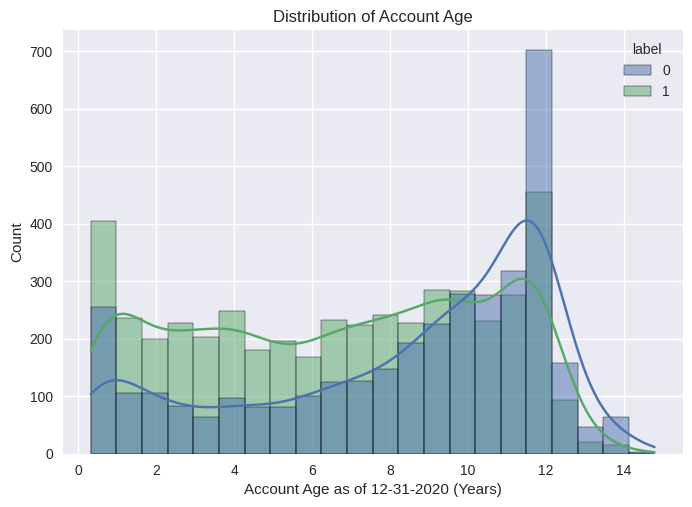

In [ ]:
sns.histplot(users, x='age', hue='label', kde=True)
plt.title('Distribution of Account Age')
plt.xlabel('Account Age as of 12-31-2020 (Years)')
plt.savefig('account_age.png', format='png', dpi=600, transparent=True)
plt.show()

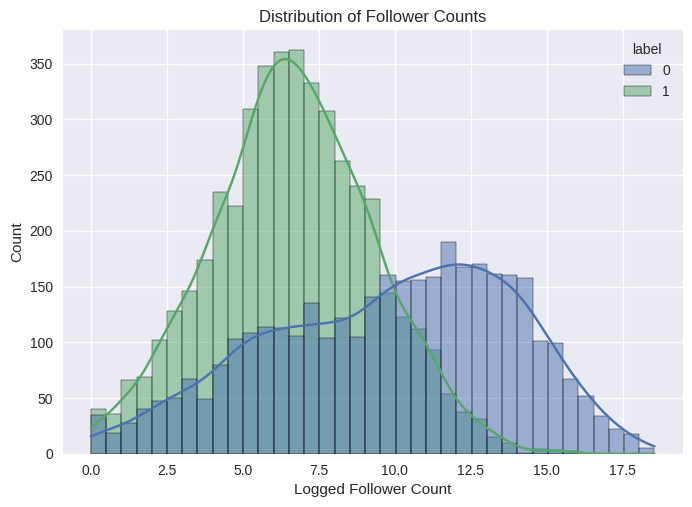

In [ ]:
users['followers_count'] = pd.to_numeric(users['followers_count'])
sns.histplot(x=np.log(users['followers_count']), hue=users['label'], kde=True)
plt.xlabel('Logged Follower Count')
plt.title('Distribution of Follower Counts')
plt.savefig('follower_counts.png', format='png', dpi=600, transparent=True)
plt.show()

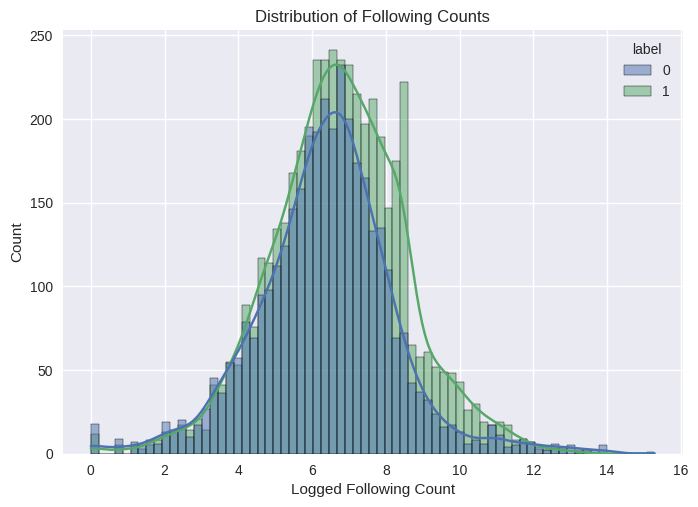

In [ ]:
users['friends_count'] = pd.to_numeric(users['friends_count'])
sns.histplot(x=np.log(users['friends_count']), hue=users['label'], kde=True)
plt.xlabel('Logged Following Count')
plt.title('Distribution of Following Counts')
# plt.savefig('following_counts.png', format='png', dpi=600, transparent=True)
plt.show()

In [ ]:
users['screen_name_length'] = users['screen_name'].apply(lambda x: len(x))
users['name_length'] = users['name'].apply(lambda x: len(x))

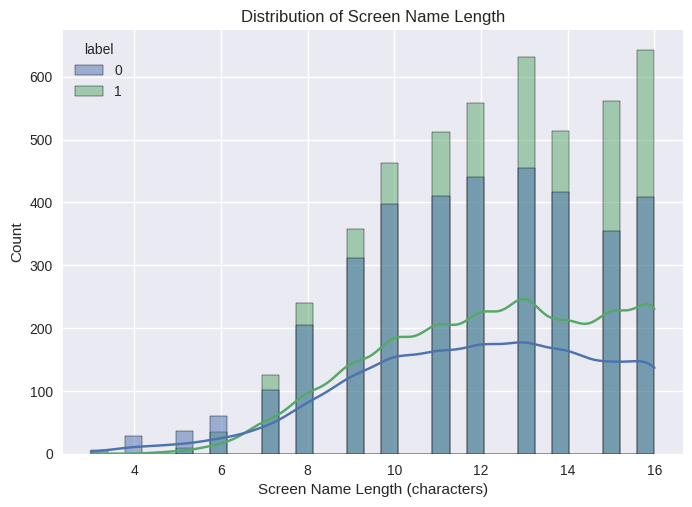

In [ ]:
sns.histplot(users, x='screen_name_length', hue='label', kde=True)
plt.xlabel('Screen Name Length (characters)')
plt.title('Distribution of Screen Name Length')
plt.savefig('screen_name.png', format='png', dpi=600, transparent=True)
plt.show()

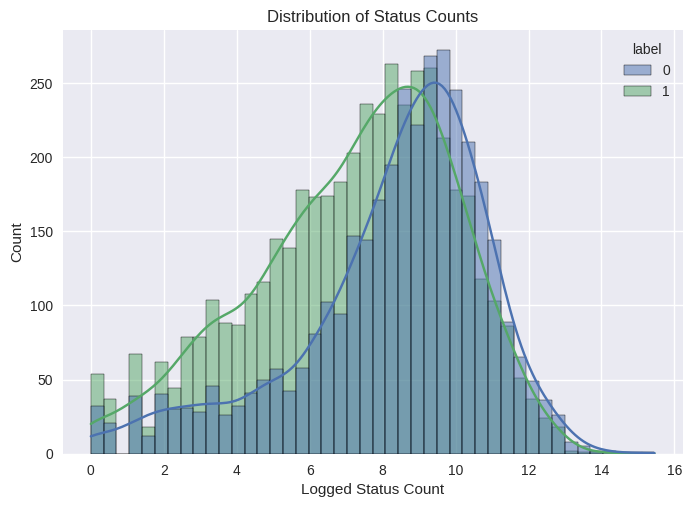

In [ ]:
users['statuses_count'] = pd.to_numeric(users['statuses_count'])
sns.histplot(x=np.log(users['statuses_count']), hue=users['label'], kde=True)
plt.xlabel('Logged Status Count')
plt.title('Distribution of Status Counts')
# plt.savefig('following_counts.png', format='png', dpi=600, transparent=True)
plt.show()

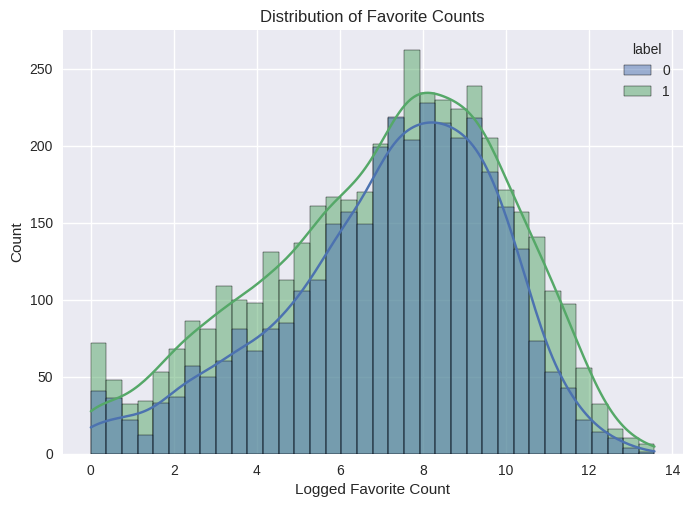

In [ ]:
users['favourites_count'] = pd.to_numeric(users['favourites_count'])
sns.histplot(x=np.log(users['favourites_count']), hue=users['label'], kde=True)
plt.xlabel('Logged Favorite Count')
plt.title('Distribution of Favorite Counts')
# plt.savefig('following_counts.png', format='png', dpi=600, transparent=True)
plt.show()

In [ ]:
cv = CountVectorizer(stop_words=stopword_list, max_features=100)
vec_array = cv.fit_transform(tweets['cleaned_tweets'])

In [ ]:
def get_top_n_words(vec_array, n=100):
  sums = vec_array.sum(axis=0)
  sums = np.array(sums).flatten()
  return cv.get_feature_names_out()[sums.argsort()[::-1][:n]] # top ten words

In [ ]:
def plot_top_n_words(vec_array, n=100):
  word_counts = vec_array.sum(axis=0)
  word_counts = np.array(word_counts).flatten()
  word_counts = pd.DataFrame({'word':cv.get_feature_names_out(),
                              'count':word_counts})
  word_counts = word_counts.sort_values('count', ascending=False).head(n)

  plt.figure(figsize=(15,5))
  plt.bar(word_counts['word'], word_counts['count'])
  plt.xticks(rotation=90)
  return word_counts

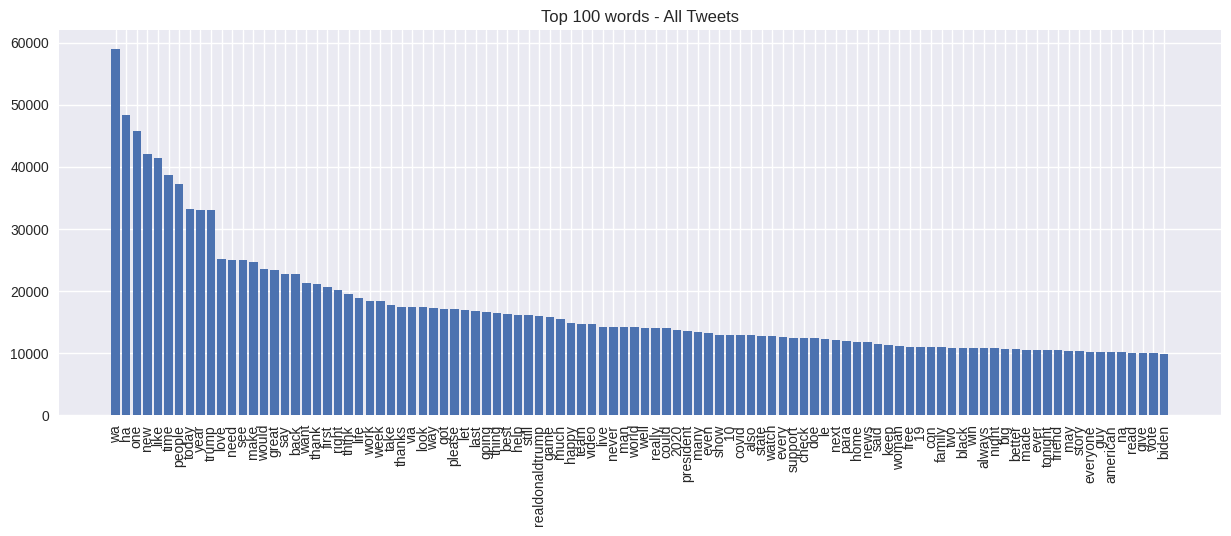

In [ ]:
plot_top_n_words(vec_array)
plt.title('Top 100 words - All Tweets')
plt.savefig('top_100_words_all.png', format='png', dpi=600, transparent=True)
plt.show()

Text(0.5, 1.0, 'Top 100 words - Bot Tweets')

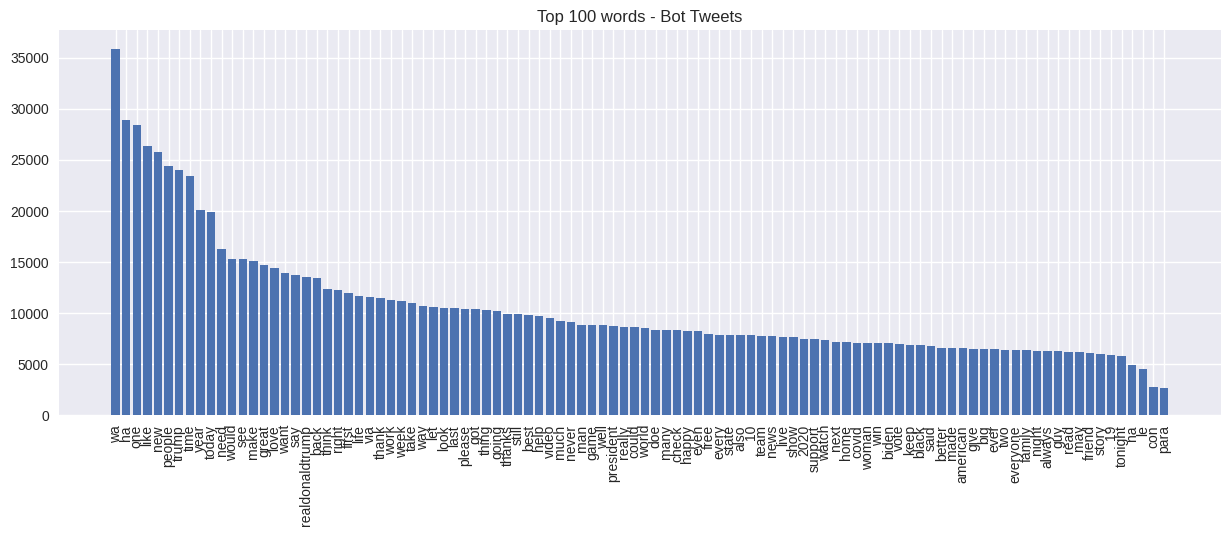

In [ ]:
bot_vec_array = cv.transform(tweets[tweets['label'] == 1]['cleaned_tweets'])
bot_counts = plot_top_n_words(bot_vec_array)
plt.savefig('top_100_words_bot.png', format='png', dpi=600, transparent=True)
plt.title('Top 100 words - Bot Tweets')

Text(0.5, 1.0, 'Top 100 words - Real Tweets')

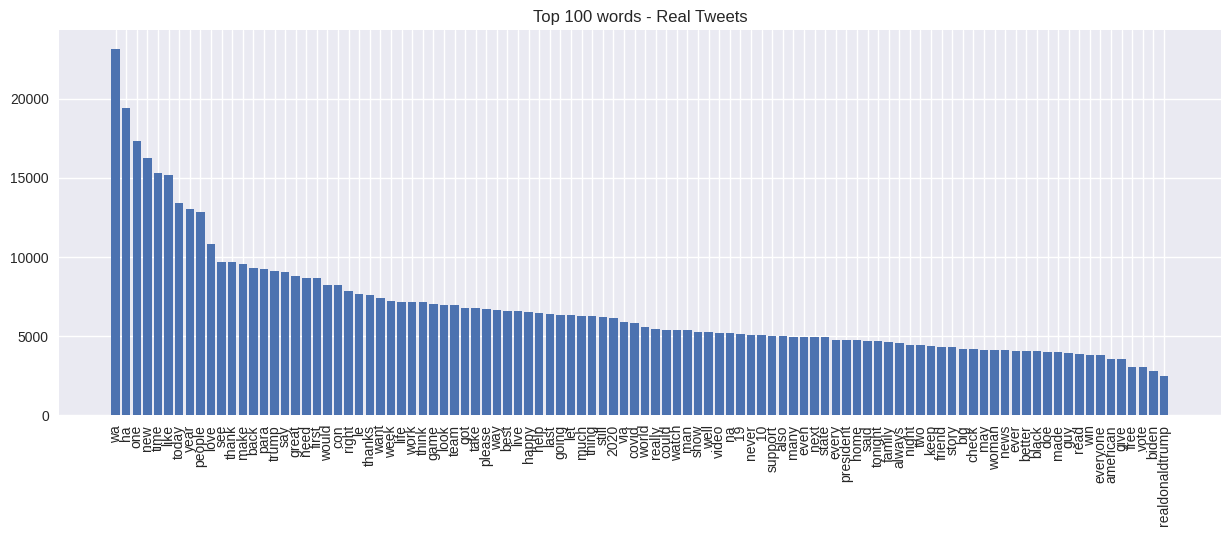

In [ ]:
real_vec_array = cv.transform(tweets[tweets['label'] == 0]['cleaned_tweets'])
real_counts = plot_top_n_words(real_vec_array)
plt.savefig('top_100_words_real.png', format='png', dpi=600, transparent=True)
plt.title('Top 100 words - Real Tweets')

In [ ]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(vec_array.toarray())

In [ ]:
labels = np.array(tweets['label'])

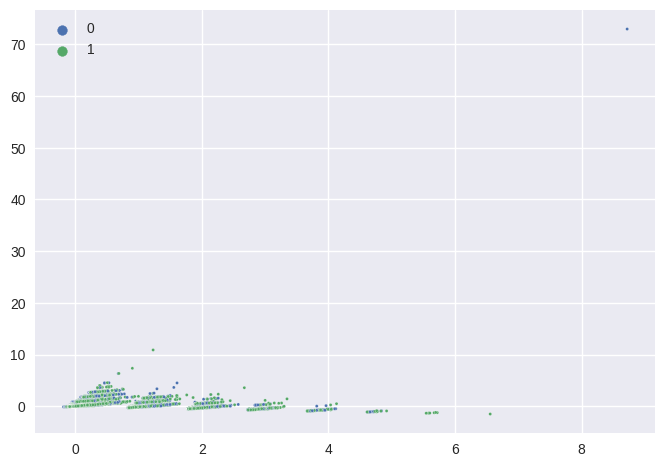

In [ ]:
sns.scatterplot(x=pca_array[:,0], y=pca_array[:,1], hue=labels, s=5)
plt.show()

In [ ]:
idx = np.random.randint(vec_array.shape[0], size=10000)
to_tsne = vec_array.toarray()[idx]
tsne_labels = labels[idx]

In [ ]:
tsne = TSNE(n_components=2, perplexity=3)
tsne_array = tsne.fit_transform(to_tsne)

<Axes: >

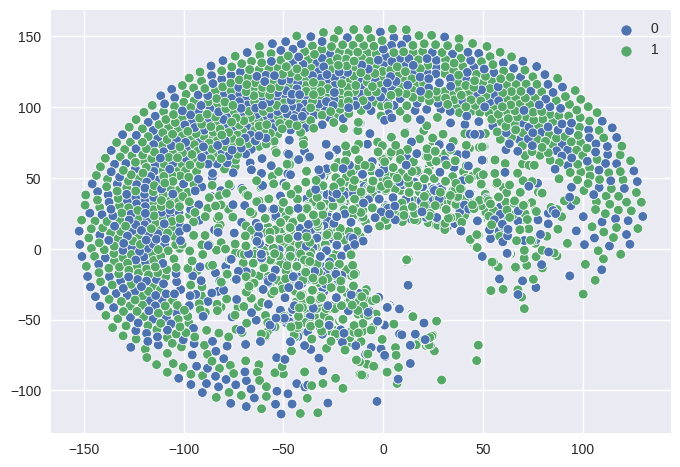

In [ ]:
sns.scatterplot(x=tsne_array[:,0], y=tsne_array[:,1], hue=tsne_labels)

In [ ]:
# Export, call this to export the CSVs
def export_cleaned():
  tweets.to_csv('clean_train.csv', index=False)
  print('Exported Train CSV')

  test_tweets.to_csv('clean_test.csv', index=False)
  print('Exported Test CSV')

In [ ]:
# export_cleaned()

Exported Train CSV
Exported Test CSV
